In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
# Data Frame
print(df)

    Chirps/Second  Ground Temperature
0            20.0                88.6
1            16.0                71.6
2            19.8                93.3
3            18.4                84.3
4            17.1                80.6
5            15.5                75.2
6            14.7                69.7
7            15.7                71.6
8            15.4                69.4
9            16.3                83.3
10           15.0                79.6
11           17.2                82.6
12           16.0                80.6
13           17.0                83.5
14           14.4                76.3


In [4]:
# Linear Regression Equation
X = np.array(df["Chirps/Second"])
Y = np.array(df["Ground Temperature"])
print("Xmean: ",np.mean(X))
print("Ymean: ",np.mean(Y))
b1 = np.sum((X-np.mean(X))*(Y-np.mean(Y)))/np.sum(pow(X-np.mean(X),2))
print("\nb1: ",round(b1,2))
b0 = np.mean(Y) - b1*np.mean(X)
print("b0: ",round(b0,2))
print("\nEquation: Y = {} +({})X".format(round(b0,2),round(b1,2)))

Xmean:  16.566666666666666
Ymean:  79.34666666666665

b1:  3.41
b0:  22.85

Equation: Y = 22.85 +(3.41)X


In [40]:
# Y prediction
Y_pred = b0 + (b1)*X
print(f"Predicted Y: {Y_pred}")

Predicted Y: [91.0554423 77.4141503 90.3733777 85.5989255 81.1655056 75.7089888
 72.9807304 76.3910534 75.3679565 78.4372472 74.0038273 81.5065379
 77.4141503 80.8244733 71.9576335]


In [20]:
# R2 Score using Equation
r2_score = np.sum((Y_pred - np.mean(Y))**2) / np.sum((Y - np.mean(Y))**2)
print(r2_score)

0.6922946529147 0.6922946529147013


In [24]:
# Extrapolate
# input_Y: Ground Temperature, predict_X: Chirps/Second
input_Y = 95
predict_X = (input_Y - b0)/b1
print(f"Chirps/Second when Ground Temperature is {input_Y} = {predict_X}")

Chirps/Second when Ground Temperature is 95 = 21.156652229784402


In [26]:
# Interpolate
# input_X: Chirps/Second, predict_Y: Ground Temperature
input_X = 18
predict_Y = b0 + b1*(input_X)
print(f"Ground Temperature when Chirps/Second is {input_X} = {predict_Y}")

Ground Temperature when Chirps/Second is 18 = 84.23479629930205


[]

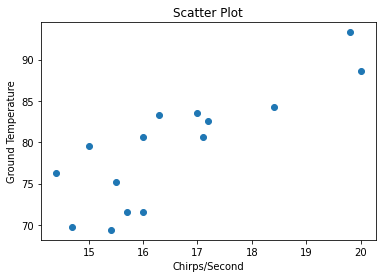

In [6]:
# Scatter Plot - Plot Data Points
plt.scatter(X, Y)
plt.title("Scatter Plot")
plt.xlabel("Chirps/Second")
plt.ylabel("Ground Temperature")
plt.plot()

[]

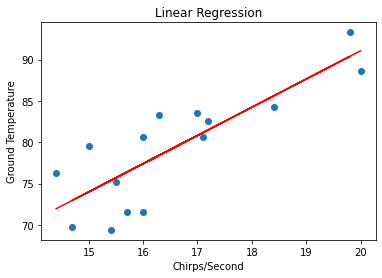

In [8]:
# Linear Regression Line Plot
plt.scatter(X, Y)
plt.plot(X, b0 +(b1)*X, color='RED')
plt.title("Linear Regression")
plt.xlabel("Chirps/Second")
plt.ylabel("Ground Temperature")
plt.plot()

In [39]:
# Using sklearn
reg = linear_model.LinearRegression()
reshape_X = X.reshape(-1, 1)
model = reg.fit(reshape_X, Y)
r2_score_sklearn = reg.score(reshape_X, Y)
input_X = np.array(18).reshape(-1, 1)
reg_opp = linear_model.LinearRegression()
reshape_Y = Y.reshape(-1, 1)
model_opp = reg_opp.fit(reshape_Y, X)
input_Y = np.array(95).reshape(-1, 1)
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R2 Score: {r2_score_sklearn}")
print(f"Predicted Chirps/Second: {reg_opp.predict(input_Y)}")
print(f"Predicted Ground Temperature: {reg.predict(input_X)}")

Coefficient: [3.410323]
Intercept: 22.848982308066887
R2 Score: 0.6922946529147003
Predicted Chirps/Second: [19.74428913]
Predicted Ground Temperature: [84.2347963]


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [42]:
df = pd.read_fwf("/content/brain_body.txt")

In [54]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

In [48]:
print(df)

      Brain   Body
0     3.385   44.5
1     0.480   15.5
2     1.350    8.1
3   465.000  423.0
4    36.330  119.5
..      ...    ...
57  160.000  169.0
58    0.900    2.6
59    1.620   11.4
60    0.104    2.5
61    4.235   50.4

[62 rows x 2 columns]


In [57]:
# Linear Regression Equation
X = np.array(df["Brain"])
Y = np.array(df["Body"])
print("Xmean: ",np.mean(X))
print("Ymean: ",np.mean(Y))
b1 = np.sum((X-np.mean(X))*(Y-np.mean(Y)))/np.sum(pow(X-np.mean(X),2))
print("\nb1: ",round(b1,2))
b0 = np.mean(Y) - b1*np.mean(X)
print("b0: ",round(b0,2))
print("\nEquation: Y = {} +({})X".format(round(b0,2),round(b1,2)))

Xmean:  198.78998387096775
Ymean:  283.13419354838715

b1:  0.97
b0:  91.0

Equation: Y = 91.0 +(0.97)X


In [61]:
# Y prediction
Y_pred = b0 + (b1)*X
print(f"Predicted Y: {Y_pred}")

Predicted Y: [  94.27598641   91.46831446   92.3091663   540.42520718  126.11720924
  117.73768574  105.33753734   92.00955243   95.05401599   91.41515716
   91.10201234   91.89357287   91.97089258   91.00922869   91.06238599
   94.38713349   92.93738894   92.64744003 2552.67064467   91.02662562
  271.8358666   594.54900376   91.76309586  100.66935988   94.19383422
   91.19769548   92.36715609  602.28097471  291.06914432  173.15658746
   91.72926848  150.927171   6522.0712267    94.38713349   97.57657151
  124.83176908   94.9187065    91.12037577   91.02662562   91.01406117
   92.35749112  332.62848813   93.42063713  144.64494461  187.65403297
  141.41684675  101.20093289   91.53596921  148.99417827   94.48378313
   95.14873263   91.27501519   91.07688343   91.12230876   91.05078803
  276.5716988    93.90388531  245.64381504   91.87424294   92.57012032
   91.10491183   95.09750832]


In [62]:
# R2 Score using Equation
r2_score = np.sum((Y_pred - np.mean(Y))**2) / np.sum((Y - np.mean(Y))**2)
print(r2_score)

0.8726620843043326


[]

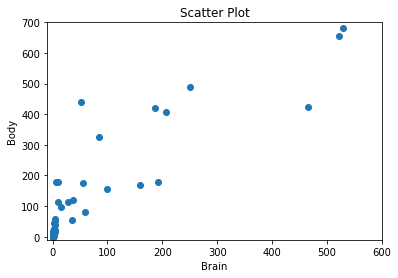

In [74]:
# Scatter Plot - Plot Data Points
plt.scatter(X, Y)
plt.title("Scatter Plot")
plt.xlabel("Brain")
plt.ylabel("Body")
plt.xlim(-10, 600)
plt.ylim(-10, 700)
plt.plot()

[]

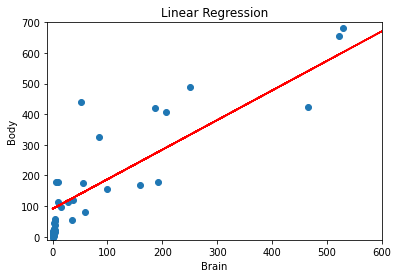

In [75]:
# Linear Regression Line Plot
plt.scatter(X, Y)
plt.plot(X, b0 +(b1)*X, color='RED')
plt.title("Linear Regression")
plt.xlabel("Brain")
plt.ylabel("Body")
plt.xlim(-10, 600)
plt.ylim(-10, 700)
plt.plot()

In [60]:
# Using sklearn
reg = linear_model.LinearRegression()
reshape_X = X.reshape(-1, 1)
model = reg.fit(reshape_X, Y)
r2_score_sklearn = reg.score(reshape_X, Y)
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R2 Score: {r2_score_sklearn}")

Coefficient: [0.96649637]
Intercept: 91.00439620740687
R2 Score: 0.8726620843043331


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [76]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [77]:
print(df)

    Sex  Rank  Year  Degree  YSdeg  Salary
0     0     3    25       1     35   36350
1     0     3    13       1     22   35350
2     0     3    10       1     23   28200
3     1     3     7       1     27   26775
4     0     3    19       0     30   33696
5     0     3    16       1     21   28516
6     1     3     0       0     32   24900
7     0     3    16       1     18   31909
8     0     3    13       0     30   31850
9     0     3    13       0     31   32850
10    0     3    12       1     22   27025
11    0     2    15       1     19   24750
12    0     3     9       1     17   28200
13    0     2     9       0     27   23712
14    0     3     9       1     24   25748
15    0     3     7       1     15   29342
16    0     3    13       1     20   31114
17    0     2    11       0     14   24742
18    0     2    10       0     15   22906
19    0     3     6       0     21   24450
20    0     1    16       0     23   19175
21    0     2     8       0     31   20525
22    0    

In [117]:
independent_columns = ["Sex", "Rank", "Year", "Degree", "YSdeg"]
dependent_column = "Salary"
X = df.loc[:, independent_columns]
Y = df.loc[:, dependent_column]

In [118]:
# Regression
reg = linear_model.LinearRegression(normalize=True)
model = reg.fit(X, Y)
r2_score_sklearn = reg.score(X, Y)

In [119]:
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R2 Score: {r2_score_sklearn}")

Coefficient: [ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354]
Intercept: 11410.146547255608
R2 Score: 0.8547180674410971


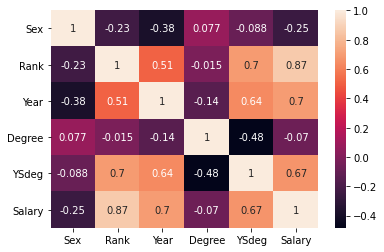

In [122]:
# Feature Importance
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

### Task 3
As clear from the heatmap using pearson coefficient, column "Sex" is sufficiently correlated with Dependent Variable "Salary" and not correlated to other control variables so as to exclude it from the model.